In [2]:
# Importing Tensor Flow
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [3]:
# Downloading and preparing the CIFAR10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0


170500096/170498071 [==============================] - 4s 0us/step


In [4]:
#Creating convolutional base
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [5]:
# Adding Dense layers on top
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [6]:
# Compiling and training the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 37s 4ms/step - loss: 1.5307 - accuracy: 0.4418 - val_loss: 1.2935 - val_accuracy: 0.5408
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1709 - accuracy: 0.5859 - val_loss: 1.1241 - val_accuracy: 0.6062
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0162 - accuracy: 0.6442 - val_loss: 1.0175 - val_accuracy: 0.6427
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9210 - accuracy: 0.6775 - val_loss: 1.0031 - val_accuracy: 0.6527
Epoch 5/10
1563/1563 [==============================] - 5s 4ms/step - loss: 0.8496 - accuracy: 0.7037 - val_loss: 0.9660 - val_accuracy: 0.6701
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7963 - accuracy: 0.7240 - val_loss: 0.9413 - val_accuracy: 0.6770
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7482 - accuracy: 0.7399 - val_loss: 0.9027 - val_accuracy

313/313 - 1s - loss: 0.8684 - accuracy: 0.7075
0.7074999809265137


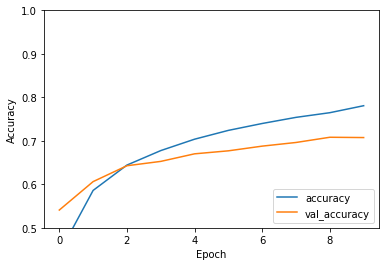

In [7]:
# Evaluating the model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print(test_acc)